In [61]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [62]:
'''
T1 - Load CSV
'''
df = pd.read_csv("sentiment_analysis.csv")

In [63]:
df.head()

,CustomerKey,WebActivity,Sentiment Analysis,SentimentRating,MaritalStatus,Gender,EstimatedYearlyIncome,NumberOfContracts,Age,Target,Available401K,CustomerValueSegment,ChurnScore,CallActivity,Products,birthday
0,11000,0,Slightly Negative,2,M,M,90000,0,44,1,1,1,0.1,4,private investment,1972-01-14
1,11000,0,Slightly Negative,2,M,M,90000,0,44,1,1,1,0.1,4,private investment,1971-08-28
2,11001,3,Slightly Positive,3,S,M,60000,1,45,1,0,1,0.0,4,private investment,1970-06-26
3,11001,3,Slightly Positive,3,S,M,60000,1,45,1,0,1,0.0,4,private investment,1971-02-11
4,11002,3,Slightly Positive,3,M,M,60000,1,45,1,1,1,0.2,4,private investment,1971-01-27


In [64]:
df.tail()

,CustomerKey,WebActivity,Sentiment Analysis,SentimentRating,MaritalStatus,Gender,EstimatedYearlyIncome,NumberOfContracts,Age,Target,Available401K,CustomerValueSegment,ChurnScore,CallActivity,Products,birthday
15162,13748,0,Positive,4,M,M,80000,0,52,0,1,2,0.1,3,fund manager+,1963-12-10
15163,12104,1,Positive,4,M,F,70000,2,61,1,1,2,1.0,4,p+b investment,1954-11-05
15164,12104,1,Positive,4,M,F,70000,2,61,1,1,2,1.0,4,p+b investment,1954-12-19
15165,13120,5,Very Positive,5,M,M,80000,4,45,0,1,1,0.0,4,private investment,1971-03-18
15166,13120,5,Very Positive,5,M,M,80000,4,45,0,1,1,0.0,4,private investment,1970-06-05


In [65]:
# a)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15167 entries, 0 to 15166
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerKey            15167 non-null  int64  
 1   WebActivity            15167 non-null  int64  
 2   Sentiment Analysis     15167 non-null  object 
 3   SentimentRating        15167 non-null  int64  
 4   MaritalStatus          15167 non-null  object 
 5   Gender                 15167 non-null  object 
 6   EstimatedYearlyIncome  15167 non-null  int64  
 7   NumberOfContracts      15167 non-null  int64  
 8   Age                    15167 non-null  int64  
 9   Target                 15167 non-null  int64  
 10  Available401K          15167 non-null  int64  
 11  CustomerValueSegment   15167 non-null  int64  
 12  ChurnScore             15167 non-null  float64
 13  CallActivity           15167 non-null  int64  
 14  Products               15167 non-null  object 
 15  bi

In [67]:
df.describe()

,CustomerKey,WebActivity,SentimentRating,EstimatedYearlyIncome,NumberOfContracts,Age,Target,Available401K,CustomerValueSegment,ChurnScore,CallActivity
count,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000
mean,17559.847102,0.999473,1.850926,57718.072130,1.465484,48.203402,0.486781,0.696380,2.097251,0.268893,3.236896
std,5576.039383,1.519967,1.619925,32091.910319,1.144962,11.300184,0.499842,0.459836,0.688901,0.332298,1.262360
min,11000.000000,0.000000,0.000000,10000.000000,0.000000,29.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,12256.500000,0.000000,0.000000,30000.000000,1.000000,40.000000,0.000000,0.000000,2.000000,0.000000,2.000000
50%,14967.000000,0.000000,2.000000,60000.000000,1.000000,46.000000,0.000000,1.000000,2.000000,0.100000,3.000000
75%,23045.500000,2.000000,3.000000,70000.000000,2.000000,56.000000,1.000000,1.000000,3.000000,0.500000,4.000000
max,27336.000000,5.000000,5.000000,170000.000000,4.000000,100.000000,1.000000,1.000000,3.000000,1.000000,5.000000


In [68]:
print("Valores únicos de MaritalStatus:", df['MaritalStatus'].unique())
print("Valores únicos de Gender:", df['Gender'].unique())

Valores únicos de MaritalStatus: ['M' 'S']
Valores únicos de Gender: ['M' 'F']


In [69]:
df['MaritalStatus'] = df['MaritalStatus'].map({'M': 1, 'S': 0})
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.head()

,CustomerKey,WebActivity,Sentiment Analysis,SentimentRating,MaritalStatus,Gender,EstimatedYearlyIncome,NumberOfContracts,Age,Target,Available401K,CustomerValueSegment,ChurnScore,CallActivity,Products,birthday
0,11000,0,Slightly Negative,2,1,1,90000,0,44,1,1,1,0.1,4,private investment,1972-01-14
1,11000,0,Slightly Negative,2,1,1,90000,0,44,1,1,1,0.1,4,private investment,1971-08-28
2,11001,3,Slightly Positive,3,0,1,60000,1,45,1,0,1,0.0,4,private investment,1970-06-26
3,11001,3,Slightly Positive,3,0,1,60000,1,45,1,0,1,0.0,4,private investment,1971-02-11
4,11002,3,Slightly Positive,3,1,1,60000,1,45,1,1,1,0.2,4,private investment,1971-01-27


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15167 entries, 0 to 15166
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerKey            15167 non-null  int64  
 1   WebActivity            15167 non-null  int64  
 2   Sentiment Analysis     15167 non-null  object 
 3   SentimentRating        15167 non-null  int64  
 4   MaritalStatus          15167 non-null  int64  
 5   Gender                 15167 non-null  int64  
 6   EstimatedYearlyIncome  15167 non-null  int64  
 7   NumberOfContracts      15167 non-null  int64  
 8   Age                    15167 non-null  int64  
 9   Target                 15167 non-null  int64  
 10  Available401K          15167 non-null  int64  
 11  CustomerValueSegment   15167 non-null  int64  
 12  ChurnScore             15167 non-null  float64
 13  CallActivity           15167 non-null  int64  
 14  Products               15167 non-null  object 
 15  bi

In [71]:
# b)

In [72]:
# Selecionar apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Medidas de Dispersão Estatística
range_values = df_numeric.max() - df_numeric.min()
print("\nIntervalo (Range):\n", range_values)


Intervalo (Range):
 CustomerKey               16336.0
WebActivity                   5.0
SentimentRating               5.0
MaritalStatus                 1.0
Gender                        1.0
EstimatedYearlyIncome    160000.0
NumberOfContracts             4.0
Age                          71.0
Target                        1.0
Available401K                 1.0
CustomerValueSegment          2.0
ChurnScore                    1.0
CallActivity                  4.0
dtype: float64


In [73]:
# Variância
variance_values = df_numeric.var()
print("\nVariância:\n", variance_values)


Variância:
 CustomerKey              3.109222e+07
WebActivity              2.310299e+00
SentimentRating          2.624156e+00
MaritalStatus            2.470897e-01
Gender                   2.500165e-01
EstimatedYearlyIncome    1.029891e+09
NumberOfContracts        1.310938e+00
Age                      1.276942e+02
Target                   2.498417e-01
Available401K            2.114487e-01
CustomerValueSegment     4.745849e-01
ChurnScore               1.104222e-01
CallActivity             1.593554e+00
dtype: float64


In [74]:
# Desvio Padrão
std_dev_values = df_numeric.std()
print("\nDesvio Padrão:\n", std_dev_values)


Desvio Padrão:
 CustomerKey               5576.039383
WebActivity                  1.519967
SentimentRating              1.619925
MaritalStatus                0.497081
Gender                       0.500016
EstimatedYearlyIncome    32091.910319
NumberOfContracts            1.144962
Age                         11.300184
Target                       0.499842
Available401K                0.459836
CustomerValueSegment         0.688901
ChurnScore                   0.332298
CallActivity                 1.262360
dtype: float64


In [75]:
# Coeficiente de Variação (CV)
cv_values = (std_dev_values / df_numeric.mean()) * 100
print("\nCoeficiente de Variação (CV):\n", cv_values)


Coeficiente de Variação (CV):
 CustomerKey               31.754487
WebActivity              152.076895
SentimentRating           87.519667
MaritalStatus             89.710027
Gender                    99.970335
EstimatedYearlyIncome     55.601147
NumberOfContracts         78.128568
Age                       23.442710
Target                   102.683177
Available401K             66.032244
CustomerValueSegment      32.847828
ChurnScore               123.580172
CallActivity              38.999101
dtype: float64


In [76]:
# Quartis e Intervalo Interquartil (IQR)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print("\nIntervalo Interquartil (IQR):\n", IQR)


Intervalo Interquartil (IQR):
 CustomerKey              10789.0
WebActivity                  2.0
SentimentRating              3.0
MaritalStatus                1.0
Gender                       1.0
EstimatedYearlyIncome    40000.0
NumberOfContracts            1.0
Age                         16.0
Target                       1.0
Available401K                1.0
CustomerValueSegment         1.0
ChurnScore                   0.5
CallActivity                 2.0
dtype: float64


In [77]:
# c)

In [78]:
correlation_matrix = df_numeric.corr()
print("\nMatriz de Correlação:\n", correlation_matrix)


Matriz de Correlação:
                        CustomerKey  WebActivity  SentimentRating  \
CustomerKey               1.000000    -0.012609        -0.003037   
WebActivity              -0.012609     1.000000         0.462180   
SentimentRating          -0.003037     0.462180         1.000000   
MaritalStatus            -0.037607     0.090450         0.178331   
Gender                    0.007439    -0.011886        -0.007907   
EstimatedYearlyIncome    -0.076269     0.450043         0.220389   
NumberOfContracts         0.024107     0.438015         0.267603   
Age                      -0.000498     0.026917         0.506411   
Target                    0.005869    -0.077077        -0.129511   
Available401K            -0.104007     0.113072         0.178409   
CustomerValueSegment      0.049553     0.007920         0.002297   
ChurnScore                0.019722     0.173347         0.179507   
CallActivity             -0.065054     0.251202         0.310757   

                       

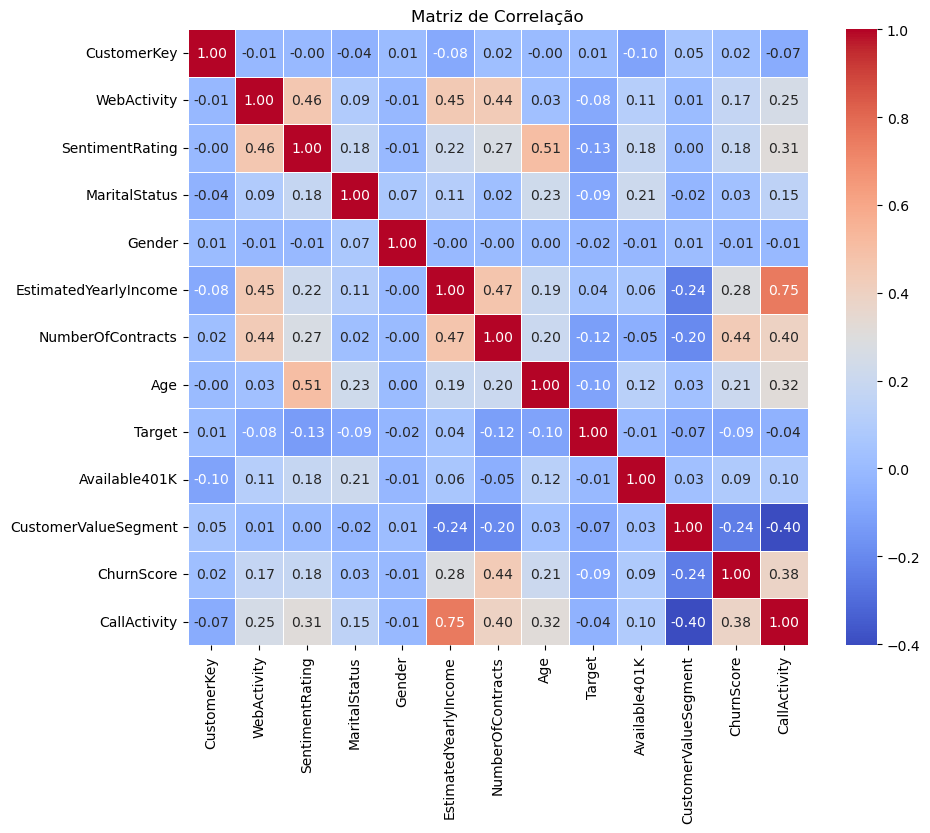

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [80]:
# T2

<Axes: xlabel='EstimatedYearlyIncome', ylabel='Count'>

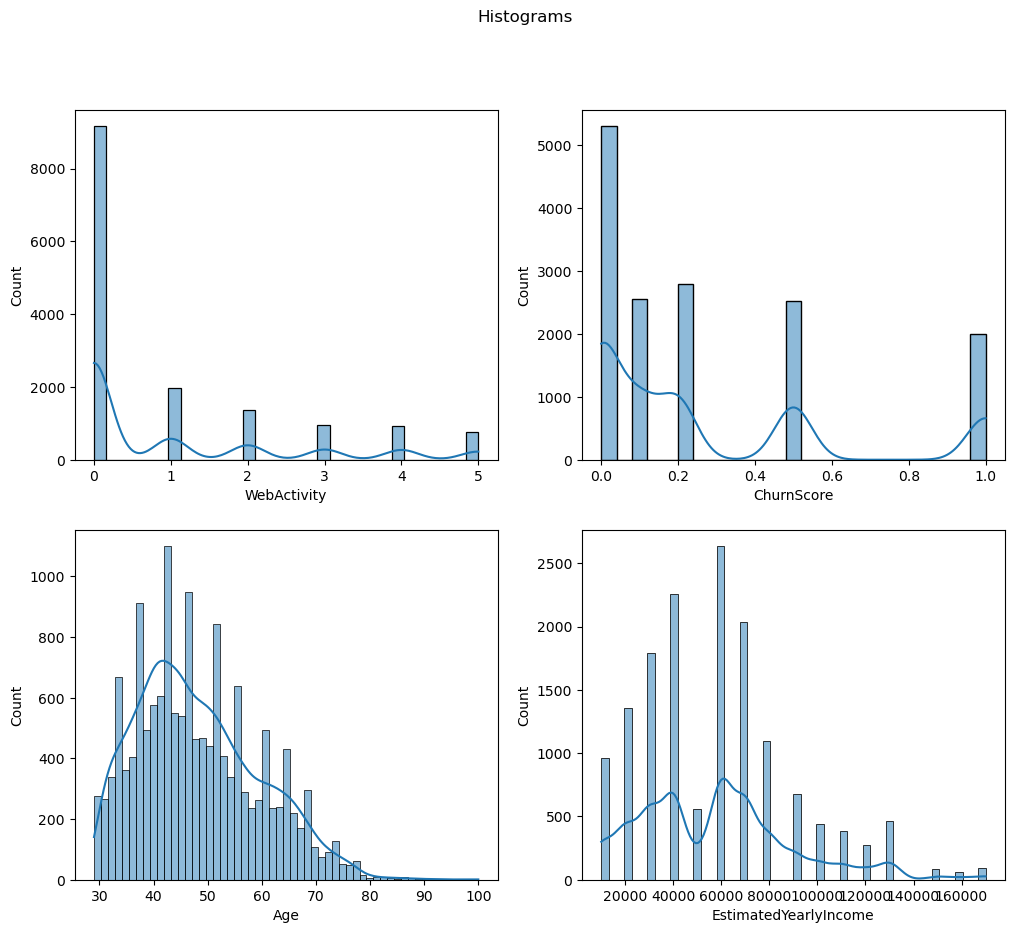

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms')

sns.histplot(df["WebActivity"], ax=axs[0, 0], kde=True)
sns.histplot(df["ChurnScore"], ax=axs[0, 1], kde=True)
sns.histplot(df["Age"], ax=axs[1, 0], kde=True)
sns.histplot(df["EstimatedYearlyIncome"], ax=axs[1, 1], kde=True)

In [85]:
# T3

In [88]:
'''
Missing data
'''
df.isna().any()

CustomerKey              False
WebActivity              False
Sentiment Analysis       False
SentimentRating          False
MaritalStatus            False
Gender                   False
EstimatedYearlyIncome    False
NumberOfContracts        False
Age                      False
Target                   False
Available401K            False
CustomerValueSegment     False
ChurnScore               False
CallActivity             False
Products                 False
birthday                 False
dtype: bool

In [87]:
'''
Drop Duplicates
'''
print(df.duplicated().sum())
print(df.drop_duplicates(inplace=True))
print(df.info())

16
None
<class 'pandas.core.frame.DataFrame'>
Index: 15151 entries, 0 to 15166
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerKey            15151 non-null  int64  
 1   WebActivity            15151 non-null  int64  
 2   Sentiment Analysis     15151 non-null  object 
 3   SentimentRating        15151 non-null  int64  
 4   MaritalStatus          15151 non-null  int64  
 5   Gender                 15151 non-null  int64  
 6   EstimatedYearlyIncome  15151 non-null  int64  
 7   NumberOfContracts      15151 non-null  int64  
 8   Age                    15151 non-null  int64  
 9   Target                 15151 non-null  int64  
 10  Available401K          15151 non-null  int64  
 11  CustomerValueSegment   15151 non-null  int64  
 12  ChurnScore             15151 non-null  float64
 13  CallActivity           15151 non-null  int64  
 14  Products               15151 non-null  object 
 15 

In [89]:
'''
Bins
'''
#info: https://scikit-learn.org/stable/modules/preprocessing.html#discretization
estimator = preprocessing.KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
df['age_binned'] = estimator.fit_transform(df[["Age"]])

print('Bin Edges')
print(estimator.bin_edges_[0])
print('Ages Bins')
print(df.groupby(by=['age_binned']).count())

Bin Edges
[ 29.  42.  52. 100.]
Ages Bins
            CustomerKey  WebActivity  Sentiment Analysis  SentimentRating  \
age_binned                                                                  
0.0                4898         4898                4898             4898   
1.0                4942         4942                4942             4942   
2.0                5311         5311                5311             5311   

            MaritalStatus  Gender  EstimatedYearlyIncome  NumberOfContracts  \
age_binned                                                                    
0.0                  4898    4898                   4898               4898   
1.0                  4942    4942                   4942               4942   
2.0                  5311    5311                   5311               5311   

             Age  Target  Available401K  CustomerValueSegment  ChurnScore  \
age_binned                                                                  
0.0         4898    48

In [91]:
# Converter a coluna 'birthday' para o tipo datetime
df['birthday'] = pd.to_datetime(df['birthday'])

# Extrair o ano, mês e dia da semana
df['year'] = df['birthday'].dt.year
df['month'] = df['birthday'].dt.month
df['day_of_week'] = df['birthday'].dt.day_name()  # Para o nome do dia da semana

# Exibir o DataFrame atualizado
print(df)

       CustomerKey  WebActivity Sentiment Analysis  SentimentRating  \
0            11000            0  Slightly Negative                2   
1            11000            0  Slightly Negative                2   
2            11001            3  Slightly Positive                3   
3            11001            3  Slightly Positive                3   
4            11002            3  Slightly Positive                3   
...            ...          ...                ...              ...   
15162        13748            0           Positive                4   
15163        12104            1           Positive                4   
15164        12104            1           Positive                4   
15165        13120            5      Very Positive                5   
15166        13120            5      Very Positive                5   

       MaritalStatus  Gender  EstimatedYearlyIncome  NumberOfContracts  Age  \
0                  1       1                  90000                 

In [93]:
df_clean = df.drop(df.loc[(df["WebActivity"]<1) & (df["Age"]>70)].index)
print(df_clean)

       CustomerKey  WebActivity Sentiment Analysis  SentimentRating  \
0            11000            0  Slightly Negative                2   
1            11000            0  Slightly Negative                2   
2            11001            3  Slightly Positive                3   
3            11001            3  Slightly Positive                3   
4            11002            3  Slightly Positive                3   
...            ...          ...                ...              ...   
15162        13748            0           Positive                4   
15163        12104            1           Positive                4   
15164        12104            1           Positive                4   
15165        13120            5      Very Positive                5   
15166        13120            5      Very Positive                5   

       MaritalStatus  Gender  EstimatedYearlyIncome  NumberOfContracts  Age  \
0                  1       1                  90000                 

In [96]:
df.groupby(by=["Sentiment Analysis"]).mean(numeric_only=True)

,CustomerKey,WebActivity,SentimentRating,MaritalStatus,Gender,EstimatedYearlyIncome,NumberOfContracts,Age,Target,Available401K,CustomerValueSegment,ChurnScore,CallActivity,age_binned,year,month
Sentiment Analysis,,,,,,,,,,,,,,,,
Negative,17125.721385,0.419045,1.0,0.716255,0.492466,51272.843860,0.713690,47.813722,0.551138,0.813081,2.222828,0.109041,2.785829,0.948702,1967.513947,6.488618
Positive,17182.675855,1.840735,4.0,0.629403,0.520163,68795.303726,1.749872,53.983155,0.384890,0.785605,2.148035,0.374068,3.883614,1.397652,1961.366514,6.432874
Slightly Negative,17869.991719,1.085128,2.0,0.576019,0.503147,57386.551838,1.527989,54.582312,0.497847,0.730706,2.026830,0.273071,3.295131,1.541570,1960.741636,6.638622
Slightly Positive,18250.390172,1.645352,3.0,0.564831,0.490231,62273.534636,1.791001,52.742451,0.454115,0.727649,2.233866,0.274778,3.404973,1.437537,1962.605092,6.415631
Very Negative,17644.589774,0.299328,0.0,0.334614,0.508161,51605.856937,1.448392,37.654585,0.534806,0.501440,2.024004,0.281829,2.930629,0.268363,1977.677628,6.486078
Very Positive,17330.412010,2.447039,5.0,0.703086,0.467056,72026.688907,2.402836,54.034195,0.337781,0.794829,1.926606,0.450209,4.031693,1.390325,1961.301918,6.537114


In [97]:
df.groupby(by=["Sentiment Analysis", "MaritalStatus"]).mean(numeric_only=True)

CustomerKey  WebActivity  SentimentRating  \
Sentiment Analysis MaritalStatus                                               
Negative           0              18314.160452     0.476836              1.0   
                   1              16654.920770     0.396150              1.0   
Positive           0              17324.979339     1.987603              4.0   
                   1              17098.886456     1.754258              4.0   
Slightly Negative  0              17770.497656     1.093750              2.0   
                   1              17943.224842     1.078781              2.0   
Slightly Positive  0              18139.751020     1.744218              3.0   
                   1              18335.631027     1.569182              3.0   
Very Negative      0              17699.420274     0.145022              0.0   
                   1              17535.558106     0.606169              0.0   
Very Positive      0              17701.382022     2.168539              5.0   
                   1              17173.750890     2.564650              5.0   

                                    Gender  EstimatedYearlyIncome  \
Sentiment Analysis MaritalStatus                                    
Negative           0              0.458757           52768.361582   
                   1              0.505819           50680.393912   
Positive           0              0.458678           65757.575758   
                   1              0.556367           70583.941606   
Slightly Negative  0              0.424219           52843.750000   
                   1              0.561242           60730.304773   
Slightly Positive  0              0.443537           54462.585034   
                   1              0.526205           68291.404612   
Very Negative      0              0.487734           49520.202020   
                   1              0.548780           55753.228121   
Very Positive      0              0.410112           66067.415730   
                   1              0.491103           74543.297746   

                                  NumberOfContracts        Age    Target  \
Sentiment Analysis MaritalStatus                                           
Negative           0                       0.741243  47.014689  0.633898   
                   1                       0.702775  48.130260  0.518353   
Positive           0                       1.792011  52.256198  0.439394   
                   1                       1.725061  55.000000  0.352798   
Slightly Negative  0                       1.363281  51.697656  0.587500   
                   1                       1.649224  56.705578  0.431857   
Slightly Positive  0                       1.669388  50.582313  0.487075   
                   1                       1.884696  54.406709  0.428721   
Very Negative      0                       1.432900  37.593795  0.528139   
                   1                       1.479197  37.775466  0.548063   
Very Positive      0                       2.325843  54.087079  0.488764   
                   1                       2.435350  54.011862  0.274021   

                                  Available401K  CustomerValueSegment  \
Sentiment Analysis MaritalStatus                                        
Negative           0                   0.630508              2.146893   
                   1                   0.885407              2.252910   
Positive           0                   0.772727              2.170799   
                   1                   0.793187              2.134631   
Slightly Negative  0                   0.701562              2.119531   
                   1                   0.752156              1.958597   
Slightly Positive  0                   0.719728              2.270748   
                   1                   0.733753              2.205451   
Very Negative      0                   0.412338              2.056638   
                   1                   0.678623              1.959110   
Very P

In [101]:
# T4
# Users mais felizes são os que mais recebem e os mais ativos na web (+ativos +salario +felizes)
# Users casados recebem mais